
# Ridgeline Plots

One of the hot new visualization types from recent years is the ridgeline plot. In a nutshell, the ridgeline plot is a series of vertically faceted line plots or density curves, but with somewhat overlapping y-axes. This can be thought of as a contrast to the line plot variation seen in the "Line Plots" part, where multiple lines were plotted on the same axes, with different hues. On this section, I'll walk through the creation of a ridgeline plot using some of the demonstration data shown in the "Faceting" section.

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('../Code/fuel-econ.csv')
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


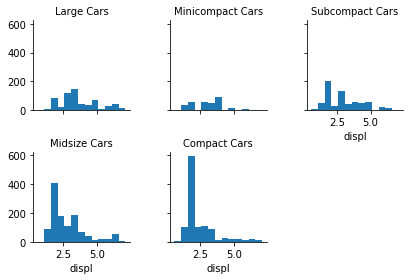

In [10]:
group_means = df.groupby([df.VClass]).mean()
group_order = group_means.sort_values(['displ'], ascending = False ).index

g = sb.FacetGrid(data = df, col = 'VClass', col_wrap = 3 , size=2, col_order = group_order)
g.map(plt.hist, 'displ', bins = np.arange(df.displ.min(), df.displ.max()+.5,.5))
g.set_titles('{col_name}')

Two things immediately come to mind **for changing the faceted histograms into a ridgeline plot**. First of all, changing the form of the distribution plots from histograms to kernel density estimates will make the overlaps a bit smoother. Second, we need to facet the levels by rows so that they're all stacked up on top of one another.

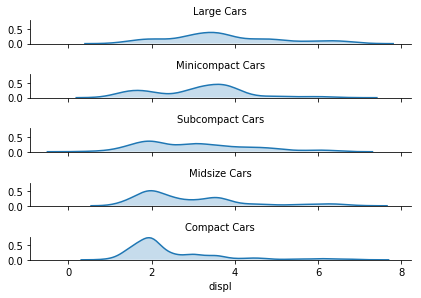

In [18]:
group_means = df.groupby(['VClass']).mean()
group_order = group_means.sort_values(['displ'], ascending=False).index

g=sb.FacetGrid(data = df, row = 'VClass', size = 0.85, aspect = 7,
              row_order = group_order)
g.map(sb.kdeplot, 'displ', shade = True)
g.set_titles('{row_name}')

**FacetGrid and set_titles change "col" to "row", also removing "col_wrap"**. 

The "size" and "aspect" dimensions have also been adjusted for the large vertical stacking of facets. The map function changes to kdeplot and removes "bins", adding the "shade" parameter in its place.

Now we've got all of the group distributions stacked on top of one another for a uni-dimensional comparison, but the plot's still pretty tall. Next, we'll create some overlap between the individual subplots.

C:\Users\ziaeeamir\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


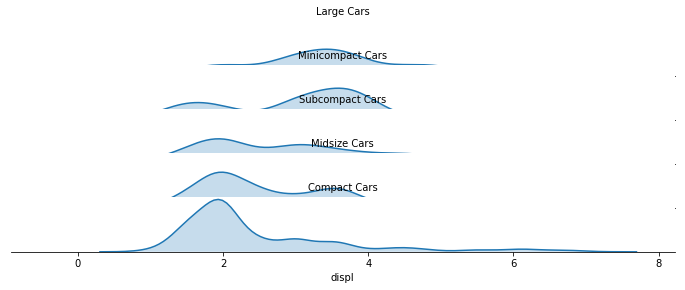

In [23]:
group_order = df.groupby(['VClass']).mean().sort_values(['displ'], ascending = False).index

# adjust the spacing between of subplots eith gridspec_kws
g = sb.FacetGrid(data = df, row='VClass', size = .85, aspect=14,
                row_order = group_order, gridspec_kws = {'hspace': -0.2}
                 )
g.map(sb.kdeplot, 'displ', shade=True)

#remove the y-axes
g.set(yticks=[])
g.despine(left =True)
g.set_titles('{row_name}')